In [1]:
import torch
import torch.nn as nn


# Mobile Net

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-2-c49b4c2e167e>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions

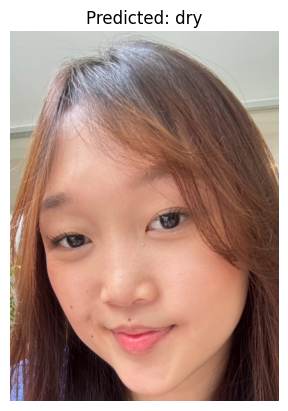


All Scores:
acne: 0.0004
dry: 0.4396
normal: 0.3233
oily: 0.0071
problematic: 0.0013
wrinkle: 0.2283


In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Function to load the trained model
def load_model(model_path, num_classes):
    # Load a MobileNet model and modify it for the specific number of classes
    model = models.mobilenet_v2(pretrained=False)  # Use MobileNet V2
    model.classifier[1] = torch.nn.Linear(model.last_channel, num_classes)  # Adjust for your number of classes
    model.load_state_dict(torch.load(model_path, map_location="cpu"))  # Load the model weights
    model.eval()  # Set the model to evaluation mode
    return model

# Function to preprocess the image
def preprocess_image(image_path):
    # Define transformations: resize, normalize, and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224 pixels
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
    ])
    image = Image.open(image_path).convert("RGB")  # Open the image and ensure it's in RGB format
    return image, transform(image).unsqueeze(0)  # Return both the original and preprocessed image

# Function to perform inference and get predictions
def predict(model, image_tensor, class_names):
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(image_tensor)  # Get raw logits from the model
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)  # Apply softmax to get class probabilities
        predicted_idx = torch.argmax(probabilities).item()  # Index of the highest probability
        return {
            "label": class_names[predicted_idx],
            "all_scores": {class_names[i]: probabilities[i].item() for i in range(len(class_names))}
        }

# Function to display the image and prediction results
def display_image_with_results(image, result):
    # Show the image
    plt.imshow(image)
    plt.axis("off")  # Remove axes for cleaner visualization
    plt.title(f"Predicted: {result['label']}")  # Display the predicted label as title
    plt.show()

    # Print all class scores
    print("\nAll Scores:")
    for label, score in result['all_scores'].items():
        print(f"{label}: {score:.4f}")

# Main execution (adjust file paths and class names)
# Define paths and class names
model_path = "/kaggle/input/mobilenet/pytorch/default/1/best_mobilenet_model.pth"  # Path to your saved model
image_path = "/kaggle/input/ivannn/flo.jpg"  # Path to the test image
#class_names = ["cat", "dog", "bird"]  # Replace with your actual class names

class_names = ["acne", "dry", "normal", "oily", "problematic", "wrinkle"]

# Load the trained model
model = load_model(model_path, num_classes=len(class_names))

# Preprocess the input image
image, image_tensor = preprocess_image(image_path)

# Perform inference to get predictions
result = predict(model, image_tensor, class_names)

# Display the image and the results
display_image_with_results(image, result)

# Resnet 50

In [3]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

num_classes = 6

# Function to load the trained model
def load_model(model_path, num_classes):
    # Load a ResNet model and modify it for the specific number of classes
    model = models.resnet50(weights='IMAGENET1K_V2')  # Use ResNet50 (not pretrained)
    num_ftrs = model.fc.in_features  # Get the number of input features for the final fully connected layer
    model.fc = torch.nn.Linear(num_ftrs, num_classes)  # Replace the final layer with a new one that matches the number of classes
    model.load_state_dict(torch.load(model_path, map_location="cpu"))  # Load the model weights
    model.eval()  # Set the model to evaluation mode
    return model

# Function to preprocess the image
def preprocess_image(image_path):
    # Define transformations: resize, normalize, and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224 pixels
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
    ])
    image = Image.open(image_path).convert("RGB")  # Open the image and ensure it's in RGB format
    return image, transform(image).unsqueeze(0)  # Return both the original and preprocessed image

# Function to perform inference and get predictions
def predict(model, image_tensor, class_names):
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(image_tensor)  # Get raw logits from the model
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)  # Apply softmax to get class probabilities
        predicted_idx = torch.argmax(probabilities).item()  # Index of the highest probability
        return {
            "label": class_names[predicted_idx],
            "all_scores": {class_names[i]: probabilities[i].item() for i in range(len(class_names))}
        }

# Function to display the image and prediction results
def display_image_with_results(image, result):
    # Show the image
    plt.imshow(image)
    plt.axis("off")  # Remove axes for cleaner visualization
    plt.title(f"Predicted: {result['label']}")  # Display the predicted label as title
    plt.show()

    # Print all class scores
    print("\nAll Scores:")
    for label, score in result['all_scores'].items():
        print(f"{label}: {score:.4f}")

# Main execution (adjust file paths and class names)
# Define paths and class names
model_path = "/kaggle/input/resnet50/pytorch/default/1/skin_best_model_resnet50.pth"  # Path to your saved model
image_path = "/kaggle/input/ivannn/flo.jpg"  # Path to the test image
#class_names = ["cat", "dog", "bird"]  # Replace with your actual class names

class_names = ["acne", "dry", "normal", "oily", "problematic", "wrinkle"]

# Load the trained model
model = load_model(model_path, num_classes=len(class_names))

# Preprocess the input image
image, image_tensor = preprocess_image(image_path)

# Perform inference to get predictions
result = predict(model, image_tensor, class_names)

# Display the image and the results
display_image_with_results(image, result)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]
<ipython-input-3-5f81513cfde4>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded

RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "stem.conv.weight", "stem.bn.weight", "stem.bn.bias", "stem.bn.running_mean", "stem.bn.running_var", "stem.bn.num_batches_tracked", "features.0.conv_dw.conv.weight", "features.0.conv_dw.bn.weight", "features.0.conv_dw.bn.bias", "features.0.conv_dw.bn.running_mean", "features.0.conv_dw.bn.running_var", "features.0.conv_dw.bn.num_batches_tracked", "features.0.conv_pwl.conv.weight", "features.0.conv_pwl.bn.weight", "features.0.conv_pwl.bn.bias", "features.0.conv_pwl.bn.running_mean", "features.0.conv_pwl.bn.running_var", "features.0.conv_pwl.bn.num_batches_tracked", "features.1.conv_exp.conv.weight", "features.1.conv_exp.bn.weight", "features.1.conv_exp.bn.bias", "features.1.conv_exp.bn.running_mean", "features.1.conv_exp.bn.running_var", "features.1.conv_exp.bn.num_batches_tracked", "features.1.conv_dw.conv.weight", "features.1.conv_dw.bn.weight", "features.1.conv_dw.bn.bias", "features.1.conv_dw.bn.running_mean", "features.1.conv_dw.bn.running_var", "features.1.conv_dw.bn.num_batches_tracked", "features.1.conv_pwl.conv.weight", "features.1.conv_pwl.bn.weight", "features.1.conv_pwl.bn.bias", "features.1.conv_pwl.bn.running_mean", "features.1.conv_pwl.bn.running_var", "features.1.conv_pwl.bn.num_batches_tracked", "features.2.conv_exp.conv.weight", "features.2.conv_exp.bn.weight", "features.2.conv_exp.bn.bias", "features.2.conv_exp.bn.running_mean", "features.2.conv_exp.bn.running_var", "features.2.conv_exp.bn.num_batches_tracked", "features.2.conv_dw.conv.weight", "features.2.conv_dw.bn.weight", "features.2.conv_dw.bn.bias", "features.2.conv_dw.bn.running_mean", "features.2.conv_dw.bn.running_var", "features.2.conv_dw.bn.num_batches_tracked", "features.2.conv_pwl.conv.weight", "features.2.conv_pwl.bn.weight", "features.2.conv_pwl.bn.bias", "features.2.conv_pwl.bn.running_mean", "features.2.conv_pwl.bn.running_var", "features.2.conv_pwl.bn.num_batches_tracked", "features.3.conv_exp.conv.weight", "features.3.conv_exp.bn.weight", "features.3.conv_exp.bn.bias", "features.3.conv_exp.bn.running_mean", "features.3.conv_exp.bn.running_var", "features.3.conv_exp.bn.num_batches_tracked", "features.3.conv_dw.conv.weight", "features.3.conv_dw.bn.weight", "features.3.conv_dw.bn.bias", "features.3.conv_dw.bn.running_mean", "features.3.conv_dw.bn.running_var", "features.3.conv_dw.bn.num_batches_tracked", "features.3.se.fc1.weight", "features.3.se.fc1.bias", "features.3.se.bn.weight", "features.3.se.bn.bias", "features.3.se.bn.running_mean", "features.3.se.bn.running_var", "features.3.se.bn.num_batches_tracked", "features.3.se.fc2.weight", "features.3.se.fc2.bias", "features.3.conv_pwl.conv.weight", "features.3.conv_pwl.bn.weight", "features.3.conv_pwl.bn.bias", "features.3.conv_pwl.bn.running_mean", "features.3.conv_pwl.bn.running_var", "features.3.conv_pwl.bn.num_batches_tracked", "features.4.conv_exp.conv.weight", "features.4.conv_exp.bn.weight", "features.4.conv_exp.bn.bias", "features.4.conv_exp.bn.running_mean", "features.4.conv_exp.bn.running_var", "features.4.conv_exp.bn.num_batches_tracked", "features.4.conv_dw.conv.weight", "features.4.conv_dw.bn.weight", "features.4.conv_dw.bn.bias", "features.4.conv_dw.bn.running_mean", "features.4.conv_dw.bn.running_var", "features.4.conv_dw.bn.num_batches_tracked", "features.4.se.fc1.weight", "features.4.se.fc1.bias", "features.4.se.bn.weight", "features.4.se.bn.bias", "features.4.se.bn.running_mean", "features.4.se.bn.running_var", "features.4.se.bn.num_batches_tracked", "features.4.se.fc2.weight", "features.4.se.fc2.bias", "features.4.conv_pwl.conv.weight", "features.4.conv_pwl.bn.weight", "features.4.conv_pwl.bn.bias", "features.4.conv_pwl.bn.running_mean", "features.4.conv_pwl.bn.running_var", "features.4.conv_pwl.bn.num_batches_tracked", "features.5.conv_exp.conv.weight", "features.5.conv_exp.bn.weight", "features.5.conv_exp.bn.bias", "features.5.conv_exp.bn.running_mean", "features.5.conv_exp.bn.running_var", "features.5.conv_exp.bn.num_batches_tracked", "features.5.conv_dw.conv.weight", "features.5.conv_dw.bn.weight", "features.5.conv_dw.bn.bias", "features.5.conv_dw.bn.running_mean", "features.5.conv_dw.bn.running_var", "features.5.conv_dw.bn.num_batches_tracked", "features.5.se.fc1.weight", "features.5.se.fc1.bias", "features.5.se.bn.weight", "features.5.se.bn.bias", "features.5.se.bn.running_mean", "features.5.se.bn.running_var", "features.5.se.bn.num_batches_tracked", "features.5.se.fc2.weight", "features.5.se.fc2.bias", "features.5.conv_pwl.conv.weight", "features.5.conv_pwl.bn.weight", "features.5.conv_pwl.bn.bias", "features.5.conv_pwl.bn.running_mean", "features.5.conv_pwl.bn.running_var", "features.5.conv_pwl.bn.num_batches_tracked", "features.6.conv_exp.conv.weight", "features.6.conv_exp.bn.weight", "features.6.conv_exp.bn.bias", "features.6.conv_exp.bn.running_mean", "features.6.conv_exp.bn.running_var", "features.6.conv_exp.bn.num_batches_tracked", "features.6.conv_dw.conv.weight", "features.6.conv_dw.bn.weight", "features.6.conv_dw.bn.bias", "features.6.conv_dw.bn.running_mean", "features.6.conv_dw.bn.running_var", "features.6.conv_dw.bn.num_batches_tracked", "features.6.se.fc1.weight", "features.6.se.fc1.bias", "features.6.se.bn.weight", "features.6.se.bn.bias", "features.6.se.bn.running_mean", "features.6.se.bn.running_var", "features.6.se.bn.num_batches_tracked", "features.6.se.fc2.weight", "features.6.se.fc2.bias", "features.6.conv_pwl.conv.weight", "features.6.conv_pwl.bn.weight", "features.6.conv_pwl.bn.bias", "features.6.conv_pwl.bn.running_mean", "features.6.conv_pwl.bn.running_var", "features.6.conv_pwl.bn.num_batches_tracked", "features.7.conv_exp.conv.weight", "features.7.conv_exp.bn.weight", "features.7.conv_exp.bn.bias", "features.7.conv_exp.bn.running_mean", "features.7.conv_exp.bn.running_var", "features.7.conv_exp.bn.num_batches_tracked", "features.7.conv_dw.conv.weight", "features.7.conv_dw.bn.weight", "features.7.conv_dw.bn.bias", "features.7.conv_dw.bn.running_mean", "features.7.conv_dw.bn.running_var", "features.7.conv_dw.bn.num_batches_tracked", "features.7.se.fc1.weight", "features.7.se.fc1.bias", "features.7.se.bn.weight", "features.7.se.bn.bias", "features.7.se.bn.running_mean", "features.7.se.bn.running_var", "features.7.se.bn.num_batches_tracked", "features.7.se.fc2.weight", "features.7.se.fc2.bias", "features.7.conv_pwl.conv.weight", "features.7.conv_pwl.bn.weight", "features.7.conv_pwl.bn.bias", "features.7.conv_pwl.bn.running_mean", "features.7.conv_pwl.bn.running_var", "features.7.conv_pwl.bn.num_batches_tracked", "features.8.conv_exp.conv.weight", "features.8.conv_exp.bn.weight", "features.8.conv_exp.bn.bias", "features.8.conv_exp.bn.running_mean", "features.8.conv_exp.bn.running_var", "features.8.conv_exp.bn.num_batches_tracked", "features.8.conv_dw.conv.weight", "features.8.conv_dw.bn.weight", "features.8.conv_dw.bn.bias", "features.8.conv_dw.bn.running_mean", "features.8.conv_dw.bn.running_var", "features.8.conv_dw.bn.num_batches_tracked", "features.8.se.fc1.weight", "features.8.se.fc1.bias", "features.8.se.bn.weight", "features.8.se.bn.bias", "features.8.se.bn.running_mean", "features.8.se.bn.running_var", "features.8.se.bn.num_batches_tracked", "features.8.se.fc2.weight", "features.8.se.fc2.bias", "features.8.conv_pwl.conv.weight", "features.8.conv_pwl.bn.weight", "features.8.conv_pwl.bn.bias", "features.8.conv_pwl.bn.running_mean", "features.8.conv_pwl.bn.running_var", "features.8.conv_pwl.bn.num_batches_tracked", "features.9.conv_exp.conv.weight", "features.9.conv_exp.bn.weight", "features.9.conv_exp.bn.bias", "features.9.conv_exp.bn.running_mean", "features.9.conv_exp.bn.running_var", "features.9.conv_exp.bn.num_batches_tracked", "features.9.conv_dw.conv.weight", "features.9.conv_dw.bn.weight", "features.9.conv_dw.bn.bias", "features.9.conv_dw.bn.running_mean", "features.9.conv_dw.bn.running_var", "features.9.conv_dw.bn.num_batches_tracked", "features.9.se.fc1.weight", "features.9.se.fc1.bias", "features.9.se.bn.weight", "features.9.se.bn.bias", "features.9.se.bn.running_mean", "features.9.se.bn.running_var", "features.9.se.bn.num_batches_tracked", "features.9.se.fc2.weight", "features.9.se.fc2.bias", "features.9.conv_pwl.conv.weight", "features.9.conv_pwl.bn.weight", "features.9.conv_pwl.bn.bias", "features.9.conv_pwl.bn.running_mean", "features.9.conv_pwl.bn.running_var", "features.9.conv_pwl.bn.num_batches_tracked", "features.10.conv_exp.conv.weight", "features.10.conv_exp.bn.weight", "features.10.conv_exp.bn.bias", "features.10.conv_exp.bn.running_mean", "features.10.conv_exp.bn.running_var", "features.10.conv_exp.bn.num_batches_tracked", "features.10.conv_dw.conv.weight", "features.10.conv_dw.bn.weight", "features.10.conv_dw.bn.bias", "features.10.conv_dw.bn.running_mean", "features.10.conv_dw.bn.running_var", "features.10.conv_dw.bn.num_batches_tracked", "features.10.se.fc1.weight", "features.10.se.fc1.bias", "features.10.se.bn.weight", "features.10.se.bn.bias", "features.10.se.bn.running_mean", "features.10.se.bn.running_var", "features.10.se.bn.num_batches_tracked", "features.10.se.fc2.weight", "features.10.se.fc2.bias", "features.10.conv_pwl.conv.weight", "features.10.conv_pwl.bn.weight", "features.10.conv_pwl.bn.bias", "features.10.conv_pwl.bn.running_mean", "features.10.conv_pwl.bn.running_var", "features.10.conv_pwl.bn.num_batches_tracked", "features.11.conv_exp.conv.weight", "features.11.conv_exp.bn.weight", "features.11.conv_exp.bn.bias", "features.11.conv_exp.bn.running_mean", "features.11.conv_exp.bn.running_var", "features.11.conv_exp.bn.num_batches_tracked", "features.11.conv_dw.conv.weight", "features.11.conv_dw.bn.weight", "features.11.conv_dw.bn.bias", "features.11.conv_dw.bn.running_mean", "features.11.conv_dw.bn.running_var", "features.11.conv_dw.bn.num_batches_tracked", "features.11.se.fc1.weight", "features.11.se.fc1.bias", "features.11.se.bn.weight", "features.11.se.bn.bias", "features.11.se.bn.running_mean", "features.11.se.bn.running_var", "features.11.se.bn.num_batches_tracked", "features.11.se.fc2.weight", "features.11.se.fc2.bias", "features.11.conv_pwl.conv.weight", "features.11.conv_pwl.bn.weight", "features.11.conv_pwl.bn.bias", "features.11.conv_pwl.bn.running_mean", "features.11.conv_pwl.bn.running_var", "features.11.conv_pwl.bn.num_batches_tracked", "features.12.conv_exp.conv.weight", "features.12.conv_exp.bn.weight", "features.12.conv_exp.bn.bias", "features.12.conv_exp.bn.running_mean", "features.12.conv_exp.bn.running_var", "features.12.conv_exp.bn.num_batches_tracked", "features.12.conv_dw.conv.weight", "features.12.conv_dw.bn.weight", "features.12.conv_dw.bn.bias", "features.12.conv_dw.bn.running_mean", "features.12.conv_dw.bn.running_var", "features.12.conv_dw.bn.num_batches_tracked", "features.12.se.fc1.weight", "features.12.se.fc1.bias", "features.12.se.bn.weight", "features.12.se.bn.bias", "features.12.se.bn.running_mean", "features.12.se.bn.running_var", "features.12.se.bn.num_batches_tracked", "features.12.se.fc2.weight", "features.12.se.fc2.bias", "features.12.conv_pwl.conv.weight", "features.12.conv_pwl.bn.weight", "features.12.conv_pwl.bn.bias", "features.12.conv_pwl.bn.running_mean", "features.12.conv_pwl.bn.running_var", "features.12.conv_pwl.bn.num_batches_tracked", "features.13.conv_exp.conv.weight", "features.13.conv_exp.bn.weight", "features.13.conv_exp.bn.bias", "features.13.conv_exp.bn.running_mean", "features.13.conv_exp.bn.running_var", "features.13.conv_exp.bn.num_batches_tracked", "features.13.conv_dw.conv.weight", "features.13.conv_dw.bn.weight", "features.13.conv_dw.bn.bias", "features.13.conv_dw.bn.running_mean", "features.13.conv_dw.bn.running_var", "features.13.conv_dw.bn.num_batches_tracked", "features.13.se.fc1.weight", "features.13.se.fc1.bias", "features.13.se.bn.weight", "features.13.se.bn.bias", "features.13.se.bn.running_mean", "features.13.se.bn.running_var", "features.13.se.bn.num_batches_tracked", "features.13.se.fc2.weight", "features.13.se.fc2.bias", "features.13.conv_pwl.conv.weight", "features.13.conv_pwl.bn.weight", "features.13.conv_pwl.bn.bias", "features.13.conv_pwl.bn.running_mean", "features.13.conv_pwl.bn.running_var", "features.13.conv_pwl.bn.num_batches_tracked", "features.14.conv_exp.conv.weight", "features.14.conv_exp.bn.weight", "features.14.conv_exp.bn.bias", "features.14.conv_exp.bn.running_mean", "features.14.conv_exp.bn.running_var", "features.14.conv_exp.bn.num_batches_tracked", "features.14.conv_dw.conv.weight", "features.14.conv_dw.bn.weight", "features.14.conv_dw.bn.bias", "features.14.conv_dw.bn.running_mean", "features.14.conv_dw.bn.running_var", "features.14.conv_dw.bn.num_batches_tracked", "features.14.se.fc1.weight", "features.14.se.fc1.bias", "features.14.se.bn.weight", "features.14.se.bn.bias", "features.14.se.bn.running_mean", "features.14.se.bn.running_var", "features.14.se.bn.num_batches_tracked", "features.14.se.fc2.weight", "features.14.se.fc2.bias", "features.14.conv_pwl.conv.weight", "features.14.conv_pwl.bn.weight", "features.14.conv_pwl.bn.bias", "features.14.conv_pwl.bn.running_mean", "features.14.conv_pwl.bn.running_var", "features.14.conv_pwl.bn.num_batches_tracked", "features.15.conv_exp.conv.weight", "features.15.conv_exp.bn.weight", "features.15.conv_exp.bn.bias", "features.15.conv_exp.bn.running_mean", "features.15.conv_exp.bn.running_var", "features.15.conv_exp.bn.num_batches_tracked", "features.15.conv_dw.conv.weight", "features.15.conv_dw.bn.weight", "features.15.conv_dw.bn.bias", "features.15.conv_dw.bn.running_mean", "features.15.conv_dw.bn.running_var", "features.15.conv_dw.bn.num_batches_tracked", "features.15.se.fc1.weight", "features.15.se.fc1.bias", "features.15.se.bn.weight", "features.15.se.bn.bias", "features.15.se.bn.running_mean", "features.15.se.bn.running_var", "features.15.se.bn.num_batches_tracked", "features.15.se.fc2.weight", "features.15.se.fc2.bias", "features.15.conv_pwl.conv.weight", "features.15.conv_pwl.bn.weight", "features.15.conv_pwl.bn.bias", "features.15.conv_pwl.bn.running_mean", "features.15.conv_pwl.bn.running_var", "features.15.conv_pwl.bn.num_batches_tracked", "features.16.conv.weight", "features.16.bn.weight", "features.16.bn.bias", "features.16.bn.running_mean", "features.16.bn.running_var", "features.16.bn.num_batches_tracked", "head.fc.weight", "head.fc.bias". 

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Function to load the trained ResNet50 model
def load_resnet_model(model_path, num_classes):
    # Initialize the ResNet50 model without any pre-trained weights
    model = models.resnet50(pretrained=False)
    
    # Modify the fully connected layer for the number of output classes
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    
    # Load the state dict of the model
    state_dict = torch.load(model_path, map_location="cpu", weights_only=True)
    
    # Create a new state_dict that only includes layers we want to load
    model_state_dict = model.state_dict()
    # Filter out unnecessary keys in state_dict that do not match the model layers
    filtered_state_dict = {k: v for k, v in state_dict.items() if k in model_state_dict}
    
    # Load the filtered state_dict
    model_state_dict.update(filtered_state_dict)  # Update the model state_dict with the filtered weights
    model.load_state_dict(model_state_dict)  # Load the weights into the model
    
    model.eval()  # Set the model to evaluation mode
    
    # Return the model, final convolution layer, and fully connected parameters
    final_conv = model.layer4[-1]  # Last convolution block
    fc_params = list(model.fc.parameters())  # Fully connected layer parameters
    
    return model, final_conv, fc_params

# Function to preprocess the image
def preprocess_image(image_path):
    # Define transformations: resize, normalize, and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224 pixels
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
    ])
    image = Image.open(image_path).convert("RGB")  # Open the image and ensure it's in RGB format
    return image, transform(image).unsqueeze(0)  # Return both the original and preprocessed image

# Function to perform inference and get predictions
def predict(model, image_tensor, class_names):
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(image_tensor)  # Get raw logits from the model
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)  # Apply softmax to get class probabilities
        predicted_idx = torch.argmax(probabilities).item()  # Index of the highest probability
        return {
            "label": class_names[predicted_idx],
            "all_scores": {class_names[i]: probabilities[i].item() for i in range(len(class_names))}
        }

# Function to display the image and prediction results
def display_image_with_results(image, result):
    # Show the image
    plt.imshow(image)
    plt.axis("off")  # Remove axes for cleaner visualization
    plt.title(f"Predicted: {result['label']}")  # Display the predicted label as title
    plt.show()

    # Print all class scores
    print("\nAll Scores:")
    for label, score in result['all_scores'].items():
        print(f"{label}: {score:.4f}")

# Main execution (adjust file paths and class names)
# Define paths and class names
model_path = "/kaggle/input/resnet50/pytorch/default/1/skin_best_model_resnet50.pth"  # Path to your saved model
image_path = "/kaggle/input/ivannn/ziddan.jpg"  # Path to the test image
class_names = ["acne", "dry", "normal", "oily", "problematic", "wrinkle"]

# Load the trained ResNet model
model, final_conv, fc_params = load_resnet_model(model_path, num_classes=len(class_names))

# Preprocess the input image
image, image_tensor = preprocess_image(image_path)

# Perform inference to get predictions
result = predict(model, image_tensor, class_names)

# Display the image and the results
display_image_with_results(image, result)

# Rexnet 150

In [ ]:
import torch
import torch.nn as nn
from torchvision import models  # Assuming you have installed the RexNet package, otherwise use custom implementation
import timm, torchmetrics
from tqdm import tqdm

# Function to load RexNet model with only model weights
def load_rexnet_model(model_path, num_classes, device="cpu"):
    # Initialize the RexNet-150 model without any pre-trained weights
    model = timm.RexNet150(pretrained=False)  # Make sure to use the correct RexNet implementation
    
    # Modify the fully connected layer to match the number of output classes
    num_ftrs = model.classifier[1].in_features  # Get the input features of the last layer
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)  # Update for your number of classes
    
    # Load the state dict of the model
    state_dict = torch.load(model_path, map_location=device, weights_only=True)
    
    # Create a new state_dict that only includes layers we want to load
    model_state_dict = model.state_dict()
    filtered_state_dict = {k: v for k, v in state_dict.items() if k in model_state_dict}
    
    # Load the filtered state_dict
    model_state_dict.update(filtered_state_dict)  # Update the model state_dict with the filtered weights
    model.load_state_dict(model_state_dict)  # Load the weights into the model
    
    model.eval()  # Set the model to evaluation mode
    
    # Extract the last convolution block and fully connected parameters for Grad-CAM
    final_conv = model.features[-1]  # Last convolution block (modify depending on your architecture)
    fc_params = list(model.classifier[1].parameters())  # Fully connected layer parameters
    
    return model.to(device), final_conv, fc_params

# Function to preprocess the image
def preprocess_image(image_path):
    from torchvision import transforms
    from PIL import Image
    
    # Define transformations: resize, normalize, and convert to tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224 pixels (or your input size)
        transforms.ToTensor(),  # Convert image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
    ])
    
    image = Image.open(image_path).convert("RGB")  # Open the image and ensure it's in RGB format
    return image, transform(image).unsqueeze(0)  # Return both the original and preprocessed image

# Function to perform inference and get predictions
def predict(model, image_tensor, class_names):
    with torch.no_grad():  # Disable gradient computation for inference
        outputs = model(image_tensor)  # Get raw logits from the model
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)  # Apply softmax to get class probabilities
        predicted_idx = torch.argmax(probabilities).item()  # Index of the highest probability
        return {
            "label": class_names[predicted_idx],
            "all_scores": {class_names[i]: probabilities[i].item() for i in range(len(class_names))}
        }

# Function to display the image and prediction results
def display_image_with_results(image, result):
    import matplotlib.pyplot as plt
    
    # Show the image
    plt.imshow(image)
    plt.axis("off")  # Remove axes for cleaner visualization
    plt.title(f"Predicted: {result['label']}")  # Display the predicted label as title
    plt.show()

    # Print all class scores
    print("\nAll Scores:")
    for label, score in result['all_scores'].items():
        print(f"{label}: {score:.4f}")

# Main execution (adjust file paths and class names)
model_path = "/kaggle/input/rexnet150/pytorch/default/1/skin_best_model_apatuhpalingbawah.pth"  # Path to your saved model
image_path = "/kaggle/input/ivannn/ivan.jpeg"  # Path to the test image
class_names = ["acne", "dry", "normal", "oily", "problematic", "wrinkle"]

# Load the trained model
model, final_conv, fc_params = load_rexnet_model(model_path, num_classes=len(class_names), device="cuda" if torch.cuda.is_available() else "cpu")

# Preprocess the input image
image, image_tensor = preprocess_image(image_path)

# Perform inference to get predictions
result = predict(model, image_tensor, class_names)

# Display the image and the results
display_image_with_results(image, result)

In [ ]:
import torch
import timm
import torch.nn as nn
from tqdm import tqdm
import torchmetrics
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the classes
classes = {0: "acne", 1: "dry", 2: "normal", 3: "oily", 5: "wrinkle", 4:"problematic"}  # Example classes, update as per your model

# Function to load the RexNet model using timm
def load_rexnet_model(model_name, num_classes, device="cpu"):
    # Load the model with pre-trained weights
    model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)
    model.to(device)
    model.eval()  # Set the model to evaluation mode
    return model

# Function to preprocess the image for the model
def preprocess_image(image_path):
    # Define image transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize the image to 224x224
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
    ])
    
    # Open the image
    image = Image.open(image_path).convert("RGB")
    # Apply the transformations and add a batch dimension
    image_tensor = transform(image).unsqueeze(0)
    return image, image_tensor

# Function to perform inference and predict class
def predict(model, image_tensor, device, class_names):
    image_tensor = image_tensor.to(device)
    with torch.no_grad():
        outputs = model(image_tensor)  # Get model predictions
        probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Apply softmax to get probabilities
        predicted_idx = torch.argmax(probabilities, dim=1).item()  # Get the predicted class index
        predicted_class = class_names[predicted_idx]  # Get the predicted class name
    return predicted_class, probabilities

# Function to display the image with the prediction
def display_image_with_results(image, prediction):
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted: {prediction}")
    plt.show()

# Function to perform Grad-CAM or other inference steps
def inference(model, device, test_dl, num_ims, row, cls_names, final_conv, fc_params):
    # This function can include Grad-CAM logic or other visualization techniques if necessary
    pass  # Leave it empty for this example

# Main function to load model and run predictions
def main():
    device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
    model_name = "rexnet_150"  # Model type
    image_path = "/kaggle/input/ivannn/evander.jpg"  # Path to your input image
    
    # Load the model
    model = load_rexnet_model(model_name, num_classes=len(classes), device=device)
    
    # Preprocess the image
    image, image_tensor = preprocess_image(image_path)
    
    # Get the model predictions
    predicted_class, probabilities = predict(model, image_tensor, device, list(classes.keys()))
    
    # Display the image with the predicted result
    display_image_with_results(image, predicted_class)
    
    # Print out the prediction probabilities
    print("\nClass Probabilities:")
    for class_name, prob in zip(list(classes.keys()), probabilities[0]):
        print(f"{class_name}: {prob.item():.4f}")

# Run the main function
main()